In [1]:
## K-Center Coreset
## Karan Vombatkere, Dec 2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf
import time

In [2]:
class Coreset_kCenter:
    """
    Class to compute K-Center Coreset
    Parameters
    ----------
        x_arr : numpy array data from Coreset_Util
        k_val : Value of k for computing k-center Coreset
        epsilon : epsilon value for Coreset
    
    ----------
    References
    1. Agarwal, Pankaj K., Sariel Har-Peled, and Kasturi R. Varadarajan. "Geometric approximation via coresets." 
    Combinatorial and computational geometry 52.1-30 (2005): 3.
    """
    
    #Initialize with parameters
    def __init__(self, x_arr, k_val, epsilon):
        self.x_array = np.array(x_arr)
        self.k = k_val
        self.epsilon = epsilon

        self.dims = self.x_array.shape[1]
        self.centers = None
        self.R_val = None

        self.coreSet_array = []


    #Function to plot Coreset and x_array
    def plot2D_coreset(self):
        if  self.coreSet_array == []:
            print("d-dimensional grid not computed yet. Compute first and then plot")
            return None

        x_plt = [vec[0] for vec in self.x_array]
        y_plt = [vec[1] for vec in self.x_array]

        plt.scatter(x_plt, y_plt, s=0.5, label = 'Points')

        c_x = [vec[0] for vec in  self.coreSet_array]
        c_y = [vec[1] for vec in  self.coreSet_array]
        plt.scatter(c_x, c_y, marker = '+', label = 'CoreSet')

        c_x = [vec[0] for vec in self.centers]
        c_y = [vec[1] for vec in self.centers]
        plt.scatter(c_x, c_y, marker = '*', color = 'black', label = 'K-Centers')


        title_text = 'k-Center Coreset for k={}, epsilon={}, n={}'.format(self.k, self.epsilon, self.x_array.shape[0])
        plt.title(title_text, fontsize=11)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.xlim([1.25*min(x_plt), 1.25*max(x_plt)])
        plt.ylim([1.25*min(y_plt), 1.25*max(y_plt)])

        plt.legend(loc='lower right', fontsize=9)
        plt.rcParams["figure.figsize"] = (8,8)
        plt.show()

        return None


    #Compute Greedy k-center with polynomial 2-approximation
    def greedy_kcenter(self):

        #Randomly select a point and add to centers
        randomPointIndex = np.random.randint(0,len(self.x_array)+1)
        s_1 = self.x_array[randomPointIndex]
        self.centers = np.array([s_1])

        #Initialize all distances initially to s_1
        point_distances = [hf.dist(self.x_array[i], s_1) for i in range(len(self.x_array))]

        while len(self.centers) < self.k:
            #Get the farthest point to add to centers
            max_point_index = point_distances.index(max(point_distances))
            maximum_dist_point = self.x_array[max_point_index]

            self.centers = np.vstack([self.centers, maximum_dist_point])
            
            #Update point distances
            point_distances = [min(hf.dist(self.x_array[i], maximum_dist_point), point_distances[i]) for i in range(len(self.x_array))]

        
        #Get the cost, R
        self.R_val = max(point_distances)

        return 

    
    #Compute d-dimensinsional grid
    def compute_d_grid(self):
        if self.R_val is None:
            print("Greedy k-centers not computed yet. Compute first and then try")
            return None

        print("Epsilon = {}, R_Cost = {}, Dimensions = {}".format(self.epsilon, self.R_val, self.dims))
        
        #Side length of d-dimensional grid
        side_length = (self.epsilon*self.R_val)/(5*self.dims)
        print("d-dimensional grid side_length = ", side_length)

        x_min, y_min, x_max, y_max = self.get_minMax_xy()
        
        #Use grid to extract coreset - currently in 2D
        x = x_min
        while x < x_max:
            y = y_min
            while y < y_max:
                
                for p in self.x_array:
                    if (x < p[0] < x+side_length) and (y < p[1] < y + side_length):
                        self.coreSet_array.append(p)
                        break

                #Advance to next cell
                y += side_length
            
            x += side_length

        return self.coreSet_array


    #Get min and max values of x and y
    def get_minMax_xy(self):
        min_X = np.amin(self.x_array, axis=0)[0]
        min_Y = np.amin(self.x_array, axis=0)[1]
        max_X = np.amax(self.x_array, axis=0)[0]
        max_Y = np.amax(self.x_array, axis=0)[1]

        return min_X, min_Y, max_X, max_Y



    #Compute the k,epsilon center coreset
    def compute_kCenter_Coreset(self):
        startTime = time.time()
        print("----------------------------------------------------------------------------------------------")
        print("Computing k-center Coreset for k={}, epsilon={}, d={}".format(self.k, self.epsilon, self.dims))

        self.greedy_kcenter()

        self.compute_d_grid()
        self.plot2D_coreset()


        print("----------------------------------------------------------------------------------------------")
        print("Generated (k,epsilon) Center Coreset of size={} on Input dimensions={}".format(len(self.coreSet_array), self.x_array.shape))
        
        runTime = time.time() - startTime
        print("Coreset computation time = {:.1f} seconds".format(runTime))

        return self.coreSet_array
    
    

In [3]:
#Test on synthetic random data
x_arr = []
for i in range(1000):
    x_val, y_val = np.random.randint(-100,101), np.random.randint(-100,101)
    x_arr.append([x_val, y_val])

In [7]:
test_kcenter = Coreset_kCenter(x_arr, 15, 0.3)

----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=15, epsilon=0.3, d=2
Epsilon = 0.3, R_Cost = 44.10215414239989, Dimensions = 2
d-dimensional grid side_length =  1.3230646242719968


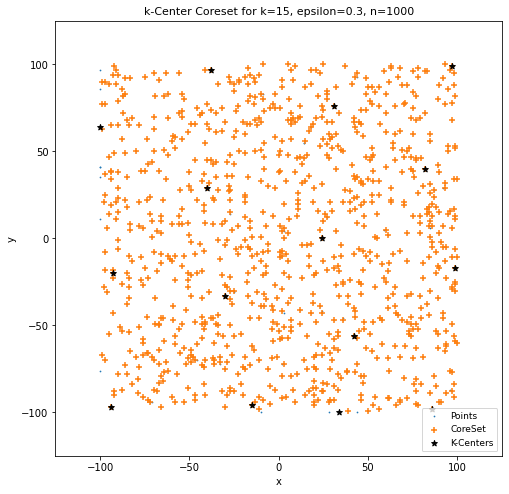

----------------------------------------------------------------------------------------------
Generated (k,epsilon) Center Coreset of size=949 on Input dimensions=(1000, 2)
Coreset computation time = 23.8 seconds


In [8]:
test_coreset = test_kcenter.compute_kCenter_Coreset()